# Lab 4: Data Preprocessing

## Author: Eric Perry

## Part A: Sleep in Mammals

### Step A: Read in Dataset and Display Descriptive Statistics

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cols = ['Species', 'BodyWt', 'BrainWt', 'NonDreaming', 'Dreaming', 'TotalSleep',
       'LifeSpan', 'Gestation', 'Predation', 'Exposure', 'Danger']
sleep_data = pd.read_csv('sleep.csv', names = cols)

In [3]:
sleep_data.shape

(60, 11)

In [4]:
sleep_data.dtypes

Species         object
BodyWt         float64
BrainWt        float64
NonDreaming    float64
Dreaming       float64
TotalSleep     float64
LifeSpan       float64
Gestation      float64
Predation        int64
Exposure         int64
Danger           int64
dtype: object

In [5]:
sleep_data.head(30)

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
5,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
6,Bigbrownbat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
7,Braziliantapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4
8,Cat,3.300,25.6,10.9,3.6,14.5,28.0,63.0,1,2,1
9,Chimpanzee,52.160,440.0,8.3,1.4,9.7,50.0,230.0,1,1,1


In [6]:
sleep_data.tail(30)

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
30,Lessershort-tailedshrew,0.005,0.14,7.7,1.4,9.1,2.6,21.5,5,2,4
31,Littlebrownbat,0.010,0.25,17.9,2.0,19.9,24.0,50.0,1,1,1
32,Man,62.000,1320.00,6.1,1.9,8.0,100.0,267.0,1,1,1
33,Molerat,0.122,3.00,8.2,2.4,10.6,NaN,30.0,2,1,1
34,Mountainbeaver,1.350,8.10,8.4,2.8,11.2,NaN,45.0,3,1,3
35,Mouse,0.023,0.40,11.9,1.3,13.2,3.2,19.0,4,1,3
36,Muskshrew,0.048,0.33,10.8,2.0,12.8,2.0,30.0,4,1,3
37,NAmericanopossum,1.700,6.30,13.8,5.6,19.4,5.0,12.0,2,1,1
38,Nine-bandedarmadillo,3.500,10.80,14.3,3.1,17.4,6.5,120.0,2,1,1
39,Okapi,250.000,490.00,NaN,NaN,4.1,23.6,440.0,5,5,5


In [7]:
sleep_data.describe()

,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
count,60.000000,60.000000,48.000000,48.000000,59.000000,56.000000,56.000000,60.000000,60.000000,60.000000
mean,196.532150,280.955333,8.672917,2.027083,10.423729,19.855357,139.616071,2.833333,2.400000,2.600000
std,912.904887,943.864566,3.666452,1.444688,4.643027,18.478665,144.647345,1.474836,1.585955,1.416609
min,0.005000,0.140000,2.100000,0.000000,2.600000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.532500,3.975000,6.250000,0.900000,7.300000,6.375000,34.500000,2.000000,1.000000,1.000000
50%,3.150000,16.500000,8.350000,1.800000,10.300000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,40.287500,160.000000,11.000000,2.600000,13.200000,27.250000,202.500000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,17.900000,6.600000,19.900000,100.000000,645.000000,5.000000,5.000000,5.000000


In [8]:
sleep_data['Predation'].value_counts()

2    15
1    14
5    13
3    11
4     7
Name: Predation, dtype: int64

In [9]:
sleep_data['Danger'].value_counts()

1    18
2    14
4    10
3    10
5     8
Name: Danger, dtype: int64

In [10]:
sleep_data['Exposure'].value_counts()

1    26
2    13
5    12
4     5
3     4
Name: Exposure, dtype: int64

### Step B: Handling Missing Data

In [11]:
sleep_data.isnull().sum()

Species         0
BodyWt          0
BrainWt         0
NonDreaming    12
Dreaming       12
TotalSleep      1
LifeSpan        4
Gestation       4
Predation       0
Exposure        0
Danger          0
dtype: int64

In [12]:
missing_rows = sleep_data[sleep_data.isnull().any(axis=1)]
missing_rows

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
12,Deserthedgehog,0.550,2.4,7.6,2.7,10.3,NaN,NaN,2,1,2
13,Donkey,187.100,419.0,NaN,NaN,3.1,40.0,365.0,5,5,5
18,Genet,1.410,17.5,4.8,1.3,6.1,34.0,NaN,1,2,1
19,Giantarmadillo,60.000,81.0,12.0,6.1,18.1,7.0,NaN,1,1,1
22,Gorilla,207.000,406.0,NaN,NaN,12.0,39.3,252.0,1,4,1
24,Graywolf,36.330,119.5,NaN,NaN,13.0,16.2,63.0,1,1,1
28,Jaguar,100.000,157.0,NaN,NaN,10.8,22.4,100.0,1,1,1


In [13]:
missing_rows.index

Int64Index([0, 2, 3, 12, 13, 18, 19, 22, 24, 28, 29, 33, 34, 39, 45, 51, 53,
            54],
           dtype='int64')

In [14]:
sleep_data.loc[29,'NonDreaming'] = 8.6
sleep_data.loc[29,'Dreaming'] = 2.0
sleep_data.loc[29,'TotalSleep'] = 10.6

In [15]:
# Group 1: Articgroundsquirrel using Groundsquirrel
sleep_data.loc[3,'LifeSpan'] = sleep_data.loc[25,'LifeSpan']

In [16]:
# Display rows and check for same LifeSpan
sleep_data.loc[[3, 25]]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,9.0,25.0,5,2,3
25,Groundsquirrel,0.101,4.0,10.4,3.4,13.8,9.0,28.0,5,1,3


In [17]:
# Group 2: Deserthedgehog using Europeanhedgehog 
sleep_data.loc[12,'LifeSpan'] = sleep_data.loc[16,'LifeSpan']
sleep_data.loc[12,'Gestation'] = sleep_data.loc[16,'Gestation']

In [18]:
# Display rows and check for LifeSpan and Gestation
sleep_data.loc[[12, 16]]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
12,Deserthedgehog,0.550,2.4,7.6,2.7,10.3,6.0,42.0,2,1,2
16,Europeanhedgehog,0.785,3.5,6.6,4.1,10.7,6.0,42.0,2,2,2


In [19]:
# Group 3: Genet using Cat
sleep_data.loc[18,'Gestation'] = sleep_data.loc[8,'Gestation']

In [20]:
# Display rows and check for same 'Gestation'
sleep_data.loc[[18, 8]]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
18,Genet,1.41,17.5,4.8,1.3,6.1,34.0,63.0,1,2,1
8,Cat,3.30,25.6,10.9,3.6,14.5,28.0,63.0,1,2,1


In [21]:
# Group 4: Giantarmadillo using 9-bandedarmadillo
sleep_data.loc[19,'Gestation'] = sleep_data.loc[38,'Gestation']

In [22]:
# Display rows and check for same 'Gestation'
sleep_data.loc[[19, 38]]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
19,Giantarmadillo,60.0,81.0,12.0,6.1,18.1,7.0,120.0,1,1,1
38,Nine-bandedarmadillo,3.5,10.8,14.3,3.1,17.4,6.5,120.0,2,1,1


In [23]:
# Group 5: Molerat using rat
sleep_data.loc[33,'LifeSpan'] = sleep_data.loc[46,'LifeSpan']

In [24]:
# Display rows and check for same LifeSpan
sleep_data.loc[[33, 46]]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
33,Molerat,0.122,3.0,8.2,2.4,10.6,4.7,30.0,2,1,1
46,Rat,0.280,1.9,10.6,2.6,13.2,4.7,21.0,3,1,3


In [25]:
# Group 6: Startnosedmole using EasternAmericanmole 
sleep_data.loc[54,'Gestation'] = sleep_data.loc[14,'Gestation']

In [26]:
# Display rows and check for same 'Gestation'
sleep_data.loc[[14, 54]]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
14,EasternAmericanmole,0.075,1.2,6.3,2.1,8.4,3.5,42.0,1,1,1
54,Starnosedmole,0.060,1.0,8.1,2.2,10.3,3.5,42.0,3,1,2


In [27]:
# Group 7: Mountainbeaver using Raccoon
sleep_data.loc[34,'LifeSpan'] = sleep_data.loc[45,'LifeSpan']

In [28]:
# Display rows and check for same 'LifeSpan'
sleep_data.loc[[34, 45]]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
34,Mountainbeaver,1.350,8.1,8.4,2.8,11.2,13.7,45.0,3,1,3
45,Raccoon,4.288,39.2,NaN,NaN,12.5,13.7,63.0,2,2,2


In [29]:
sleep_data.loc[missing_rows.index]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,9.0,25.0,5,2,3
12,Deserthedgehog,0.550,2.4,7.6,2.7,10.3,6.0,42.0,2,1,2
13,Donkey,187.100,419.0,NaN,NaN,3.1,40.0,365.0,5,5,5
18,Genet,1.410,17.5,4.8,1.3,6.1,34.0,63.0,1,2,1
19,Giantarmadillo,60.000,81.0,12.0,6.1,18.1,7.0,120.0,1,1,1
22,Gorilla,207.000,406.0,NaN,NaN,12.0,39.3,252.0,1,4,1
24,Graywolf,36.330,119.5,NaN,NaN,13.0,16.2,63.0,1,1,1
28,Jaguar,100.000,157.0,NaN,NaN,10.8,22.4,100.0,1,1,1


In [30]:
# Set A: Add a column for the proportion of 
# Dreaming sleep 
sleep_data['DreamProp'] = sleep_data['Dreaming'] / sleep_data['TotalSleep']

# Check the first five records to see that column 
# was added
sleep_data.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger,DreamProp
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,NaN
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,0.240964
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1,NaN
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,9.0,25.0,5,2,3,NaN
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,0.461538


In [31]:
# Set B: Now, we are going to use binning 
# (discretization) of the TotalSleep variable
# Create 10 groups
groups = np.arange(10)

# Divide the TotalSleep values into these groups
sleep_data['TotSleepGrp'] = pd.cut(sleep_data['TotalSleep'],10,labels=groups)

# Check the first five records to see that column 
# was added
sleep_data.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger,DreamProp,TotSleepGrp
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,NaN,0
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,0.240964,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1,NaN,5
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,9.0,25.0,5,2,3,NaN,8
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,0.461538,0


In [32]:
# Set C: Using these groups find the mean DreamProp
# for the total sleep group
dream_prop_mean = sleep_data.groupby(['TotSleepGrp'])['DreamProp'].mean()

# Use these means as groups for the DreamProp group
sleep_data['DreamPropGrp'] = pd.cut(sleep_data['TotalSleep'], 10, labels=dream_prop_mean)

# Check the first five records to see that column 
# was added
sleep_data.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger,DreamProp,TotSleepGrp,DreamPropGrp
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,NaN,0,0.241272
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,0.240964,3,0.164151
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1,NaN,5,0.138125
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,9.0,25.0,5,2,3,NaN,8,0.207020
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,0.461538,0,0.241272


In [33]:
# Set D: You can't do math with a category column
# So, create a float type column
sleep_data['DreamPropMean'] = sleep_data['DreamPropGrp'].astype('float')

In [34]:
# Set E: Use this new column to calculate the 
# missing value in 'Dreaming' column
sleep_data.loc [sleep_data['Dreaming'].isnull(), 'Dreaming'] = round(sleep_data['DreamPropMean'] * sleep_data['TotalSleep'], 1)

# Use the 'Dreaming' column to calculate the 
# missing value in 'NonDreaming' column
sleep_data.loc [sleep_data['NonDreaming'].isnull(), 'NonDreaming'] = round(sleep_data['TotalSleep'] - sleep_data['Dreaming'], 1)     

# Check that there are no more records with missing
# field values from original columns
sleep_data.isnull().sum()

Species           0
BodyWt            0
BrainWt           0
NonDreaming       0
Dreaming          0
TotalSleep        0
LifeSpan          0
Gestation         0
Predation         0
Exposure          0
Danger            0
DreamProp        11
TotSleepGrp       0
DreamPropGrp      0
DreamPropMean     0
dtype: int64

In [35]:
sleep_data.loc[missing_rows.index]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger,DreamProp,TotSleepGrp,DreamPropGrp,DreamPropMean
0,Africanelephant,6654.000,5712.0,2.5,0.8,3.3,38.6,645.0,3,5,3,NaN,0,0.241272,0.241272
2,ArcticFox,3.385,44.5,10.8,1.7,12.5,14.0,60.0,1,1,1,NaN,5,0.138125,0.138125
3,Arcticgroundsquirrel,0.920,5.7,13.1,3.4,16.5,9.0,25.0,5,2,3,NaN,8,0.207020,0.207020
12,Deserthedgehog,0.550,2.4,7.6,2.7,10.3,6.0,42.0,2,1,2,0.262136,4,0.181741,0.181741
13,Donkey,187.100,419.0,2.4,0.7,3.1,40.0,365.0,5,5,5,NaN,0,0.241272,0.241272
18,Genet,1.410,17.5,4.8,1.3,6.1,34.0,63.0,1,2,1,0.213115,2,0.188176,0.188176
19,Giantarmadillo,60.000,81.0,12.0,6.1,18.1,7.0,120.0,1,1,1,0.337017,8,0.207020,0.207020
22,Gorilla,207.000,406.0,10.3,1.7,12.0,39.3,252.0,1,4,1,NaN,5,0.138125,0.138125
24,Graywolf,36.330,119.5,10.5,2.5,13.0,16.2,63.0,1,1,1,NaN,6,0.190077,0.190077
28,Jaguar,100.000,157.0,8.8,2.0,10.8,22.4,100.0,1,1,1,NaN,4,0.181741,0.181741


In [36]:
sleep_data = sleep_data.drop(['DreamProp','TotSleepGrp','DreamPropGrp', 'DreamPropMean'],axis=1)
sleep_data.head(5)

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,2.5,0.8,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,10.8,1.7,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,13.1,3.4,16.5,9.0,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


### Step C: Display Descriptive Statistics and Interesting Facts

In [37]:
sleep_data.describe()

,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
count,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,196.532150,280.955333,8.47000,1.956667,10.426667,19.088333,134.758333,2.833333,2.400000,2.600000
std,912.904887,943.864566,3.72155,1.344085,4.603568,18.096934,141.100622,1.474836,1.585955,1.416609
min,0.005000,0.140000,2.00000,0.000000,2.600000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.532500,3.975000,6.00000,0.900000,7.650000,6.000000,40.250000,2.000000,1.000000,1.000000
50%,3.150000,16.500000,8.50000,1.800000,10.450000,13.700000,65.500000,3.000000,2.000000,2.000000
75%,40.287500,160.000000,10.82500,2.425000,13.200000,27.000000,185.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,17.90000,6.600000,19.900000,100.000000,645.000000,5.000000,5.000000,5.000000


(array([ 9.,  2.,  4.,  8., 15.,  5.,  8.,  1.,  4.,  4.]),
 array([ 2.6 ,  4.33,  6.06,  7.79,  9.52, 11.25, 12.98, 14.71, 16.44,
        18.17, 19.9 ]),
 <a list of 10 Patch objects>)

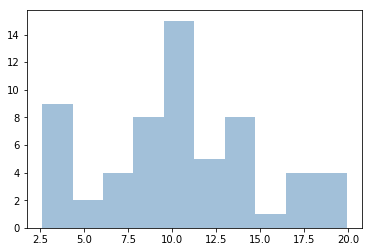

In [38]:
#Total Sleep Histogram
plt.hist(sleep_data['TotalSleep'], bins=10, alpha=0.5, color='steelblue')

(array([56.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([1.400000e-01, 5.713260e+02, 1.142512e+03, 1.713698e+03,
        2.284884e+03, 2.856070e+03, 3.427256e+03, 3.998442e+03,
        4.569628e+03, 5.140814e+03, 5.712000e+03]),
 <a list of 10 Patch objects>)

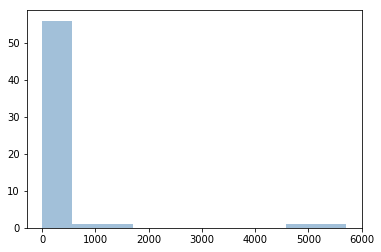

In [39]:
#BrainWt Histrogram
plt.hist(sleep_data['BrainWt'], bins=10, alpha=0.5, color='steelblue')

(array([26., 14., 10.,  5.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([  2. ,  11.8,  21.6,  31.4,  41.2,  51. ,  60.8,  70.6,  80.4,
         90.2, 100. ]),
 <a list of 10 Patch objects>)

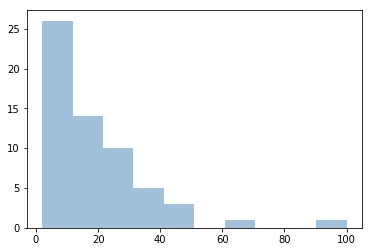

In [40]:
#LifeSpan Histogram
plt.hist(sleep_data['LifeSpan'], bins=10, alpha=0.5, color='steelblue')

(array([18.,  0., 14.,  0.,  0., 10.,  0., 10.,  0.,  8.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

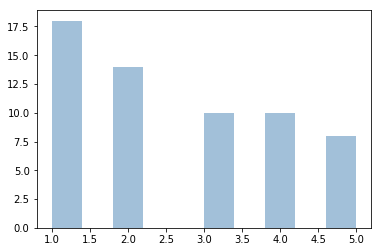

In [41]:
#Danger Histogram
plt.hist(sleep_data['Danger'], bins= 10, alpha=0.5, color='steelblue')

In [42]:
# Animal with largest body
sleep_data[sleep_data['BodyWt'].max() == sleep_data['BodyWt']]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.0,5712.0,2.5,0.8,3.3,38.6,645.0,3,5,3


In [43]:
# Top six animals which get the least amount of sleep 
# (10th percentile)
sleep_data[sleep_data['TotalSleep'].quantile(0.1) >= sleep_data['TotalSleep']]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.00,5712.0,2.5,0.8,3.3,38.6,645.0,3,5,3
13,Donkey,187.10,419.0,2.4,0.7,3.1,40.0,365.0,5,5,5
20,Goat,27.66,115.0,3.3,0.5,3.8,20.0,148.0,5,5,5
27,Horse,521.00,655.0,2.1,0.8,2.9,46.0,336.0,5,5,5
51,Roedeer,14.83,98.2,2.0,0.6,2.6,17.0,150.0,5,5,5
52,Sheep,55.50,175.0,3.2,0.6,3.8,20.0,151.0,5,5,5


In [44]:
# Top four animals who live the longest (95th percentile)
sleep_data[sleep_data['LifeSpan'].quantile(0.95) <= sleep_data['LifeSpan']]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
4,Asianelephant,2547.00,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
9,Chimpanzee,52.16,440.0,8.3,1.4,9.7,50.0,230.0,1,1,1
15,Echidna,3.00,25.0,8.6,0.0,8.6,50.0,28.0,2,2,2
32,Man,62.00,1320.0,6.1,1.9,8.0,100.0,267.0,1,1,1


### Step D: Examine the Realtionship Between the Variables

In [45]:
sleep_data.corr()

,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
BodyWt,1.000000,0.933991,-0.325902,-0.137085,-0.303485,0.304154,0.659558,0.052052,0.335323,0.123926
BrainWt,0.933991,1.000000,-0.388488,-0.147815,-0.357213,0.510727,0.757501,0.024607,0.363344,0.133768
NonDreaming,-0.325902,-0.388488,1.000000,0.553404,0.969981,-0.391560,-0.609907,-0.376430,-0.601843,-0.545963
Dreaming,-0.137085,-0.147815,0.553404,1.000000,0.739341,-0.323133,-0.409577,-0.385045,-0.524458,-0.537127
TotalSleep,-0.303485,-0.357213,0.969981,0.739341,1.000000,-0.410883,-0.612635,-0.416728,-0.639657,-0.598182
LifeSpan,0.304154,0.510727,-0.391560,-0.323133,-0.410883,1.000000,0.619656,-0.111523,0.372385,0.059251
Gestation,0.659558,0.757501,-0.609907,-0.409577,-0.612635,0.619656,1.000000,0.178824,0.621587,0.347888
Predation,0.052052,0.024607,-0.376430,-0.385045,-0.416728,-0.111523,0.178824,1.000000,0.608685,0.924824
Exposure,0.335323,0.363344,-0.601843,-0.524458,-0.639657,0.372385,0.621587,0.608685,1.000000,0.774024
Danger,0.123926,0.133768,-0.545963,-0.537127,-0.598182,0.059251,0.347888,0.924824,0.774024,1.000000


In [46]:
sleep_corr = sleep_data.corr()
grps = ['NegStrong','NegMedium','Weak', 'PosMedium', 'PosStrong']
cols = ['BodyWt','BrainWt','NonDreaming', 'Dreaming','TotalSleep','LifeSpan', 'Gestation', 'Predation', 'Exposure','Danger']
for col in cols:
    sleep_corr[col] = pd.cut(sleep_corr[col], 
          (-1,-0.7,-0.5,0.5,0.7,1), labels=grps)
sleep_corr

,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
BodyWt,PosStrong,PosStrong,Weak,Weak,Weak,Weak,PosMedium,Weak,Weak,Weak
BrainWt,PosStrong,PosStrong,Weak,Weak,Weak,PosMedium,PosStrong,Weak,Weak,Weak
NonDreaming,Weak,Weak,PosStrong,PosMedium,PosStrong,Weak,NegMedium,Weak,NegMedium,NegMedium
Dreaming,Weak,Weak,PosMedium,PosStrong,PosStrong,Weak,Weak,Weak,NegMedium,NegMedium
TotalSleep,Weak,Weak,PosStrong,PosStrong,PosStrong,Weak,NegMedium,Weak,NegMedium,NegMedium
LifeSpan,Weak,PosMedium,Weak,Weak,Weak,PosStrong,PosMedium,Weak,Weak,Weak
Gestation,PosMedium,PosStrong,NegMedium,Weak,NegMedium,PosMedium,PosStrong,Weak,PosMedium,Weak
Predation,Weak,Weak,Weak,Weak,Weak,Weak,Weak,PosStrong,PosMedium,PosStrong
Exposure,Weak,Weak,NegMedium,NegMedium,NegMedium,Weak,PosMedium,PosMedium,PosStrong,PosStrong
Danger,Weak,Weak,NegMedium,NegMedium,NegMedium,Weak,Weak,PosStrong,PosStrong,PosStrong


In [47]:
# For each of the values of Predation, display the
# median TotalSleep for those animals
sleep_data.pivot_table(index = ['Predation'], aggfunc = {'TotalSleep': 'median'}).T

Predation,1,2,3,4,5
TotalSleep,11.4,11.0,10.3,10.3,4.1


In [48]:
# For each of the values of Exposure, display the
# median TotalSleep for those animals
sleep_data.pivot_table(index = ['Exposure'], aggfunc = {'TotalSleep': 'median'}).T

Exposure,1,2,3,4,5
TotalSleep,12.9,10.7,8.9,10.9,3.85


In [49]:
# For each of the values of Danger, display the
# median TotalSleep for those animals
sleep_data.pivot_table(index = ['Danger'], aggfunc = {'TotalSleep': 'median'}).T

Danger,1,2,3,4,5
TotalSleep,12.25,10.85,12.0,9.45,3.8


### Step E: Visual Representation of Variable Relationships

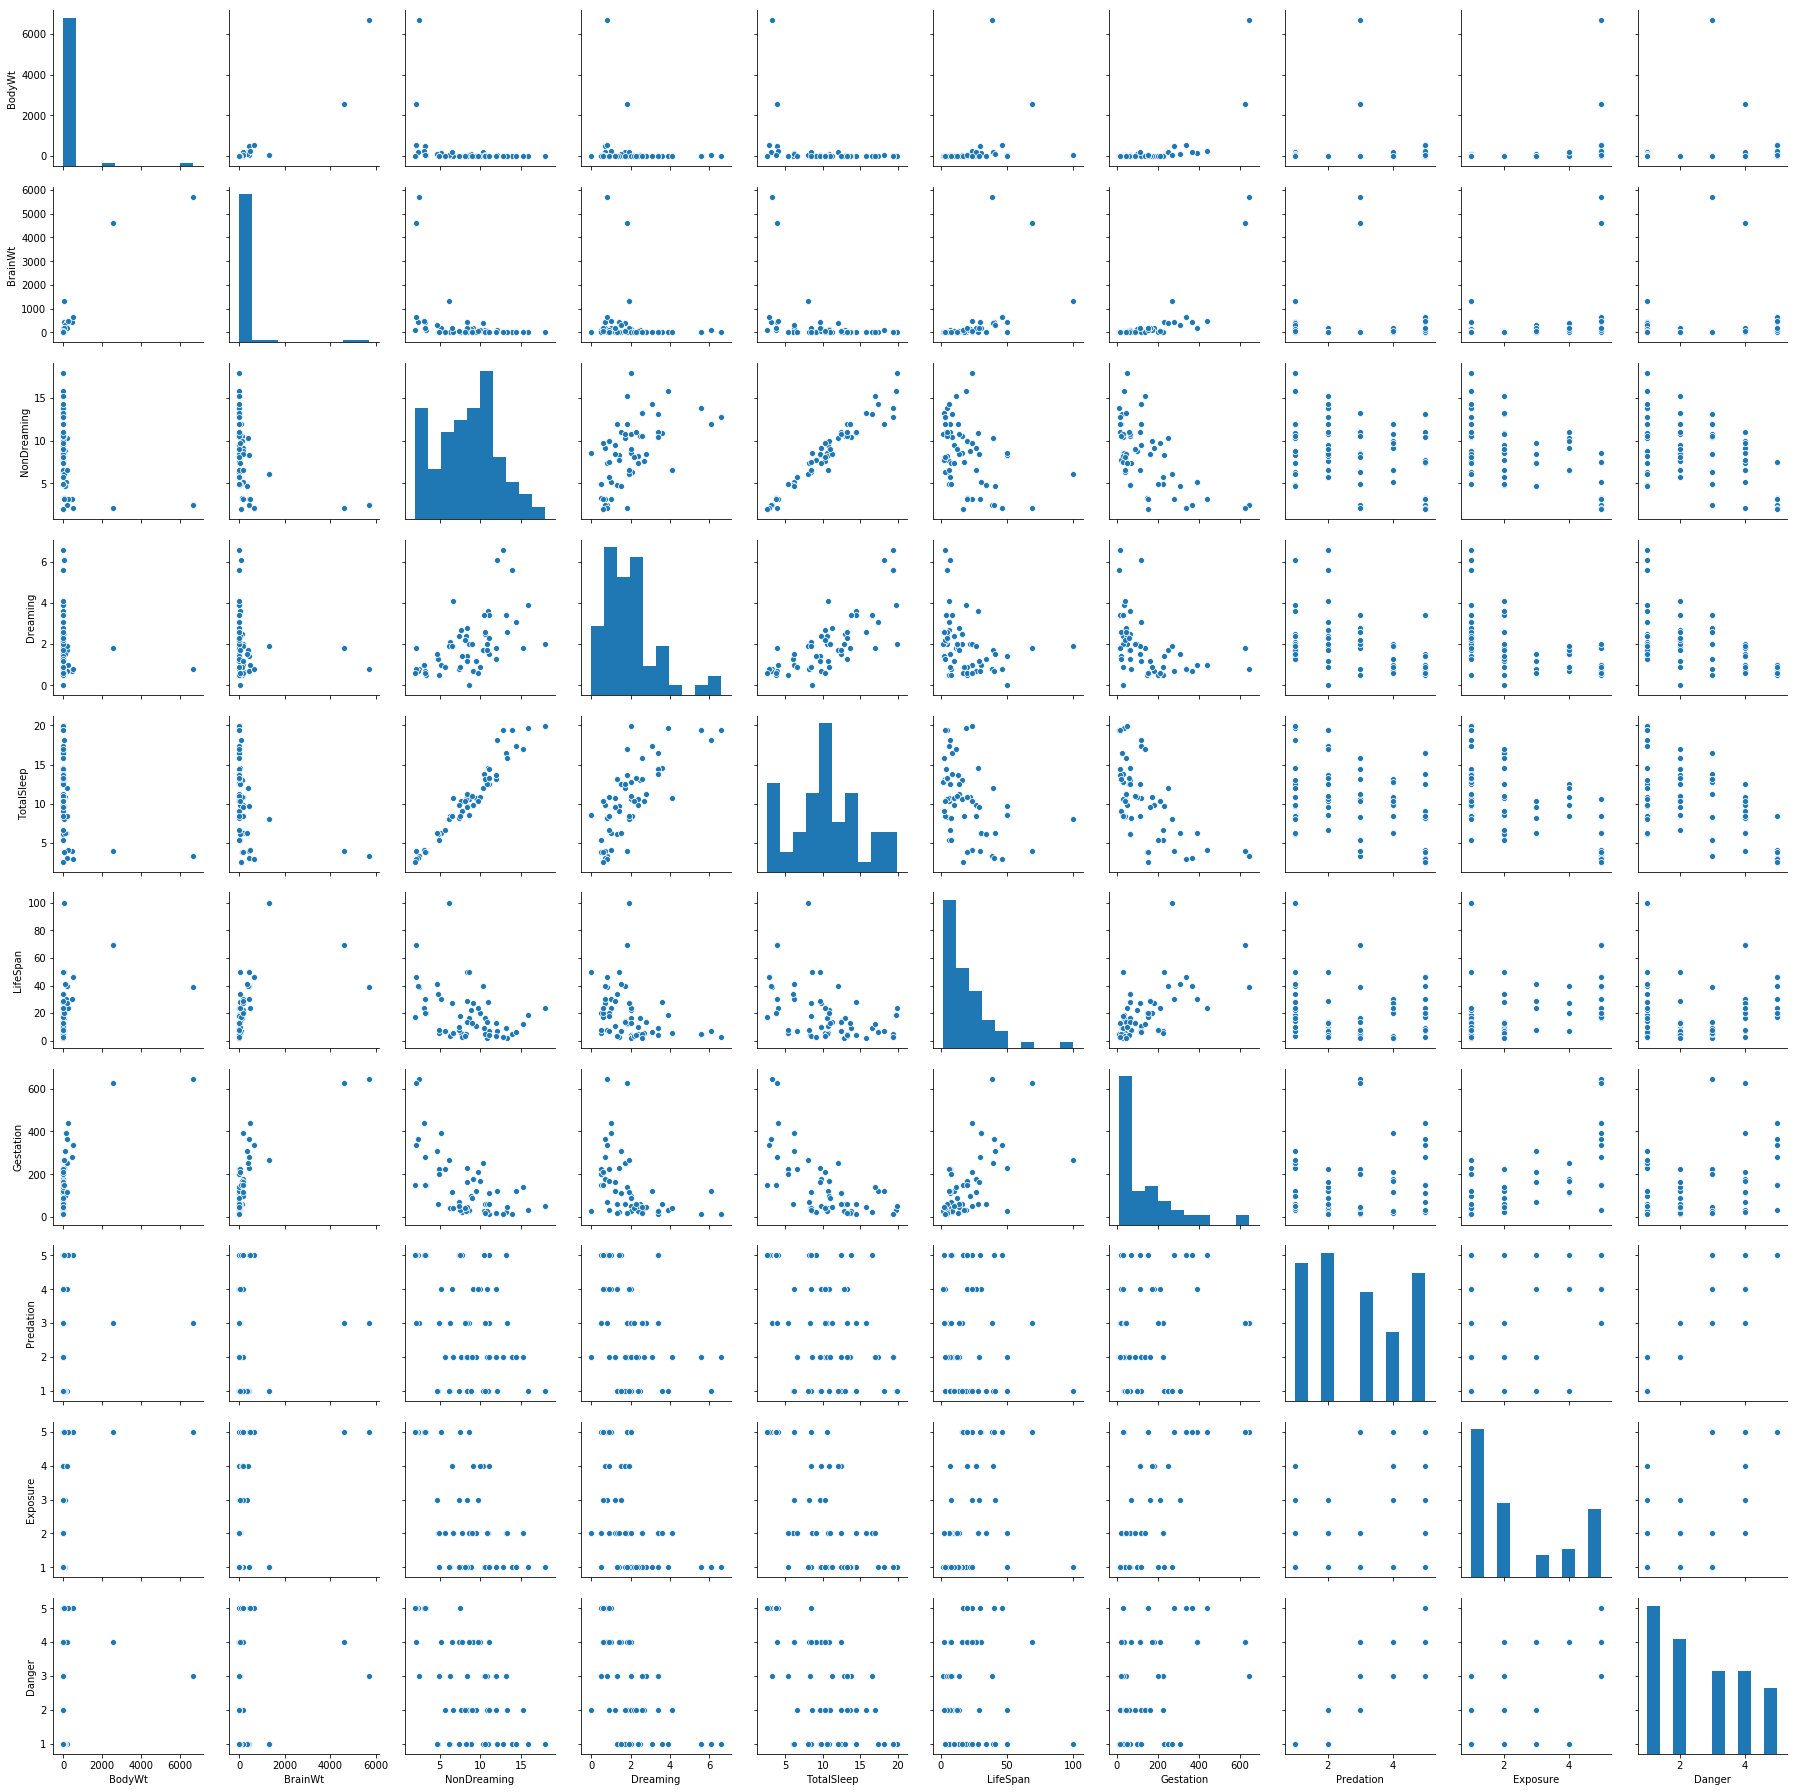

In [50]:
%matplotlib inline
sns.pairplot(sleep_data)

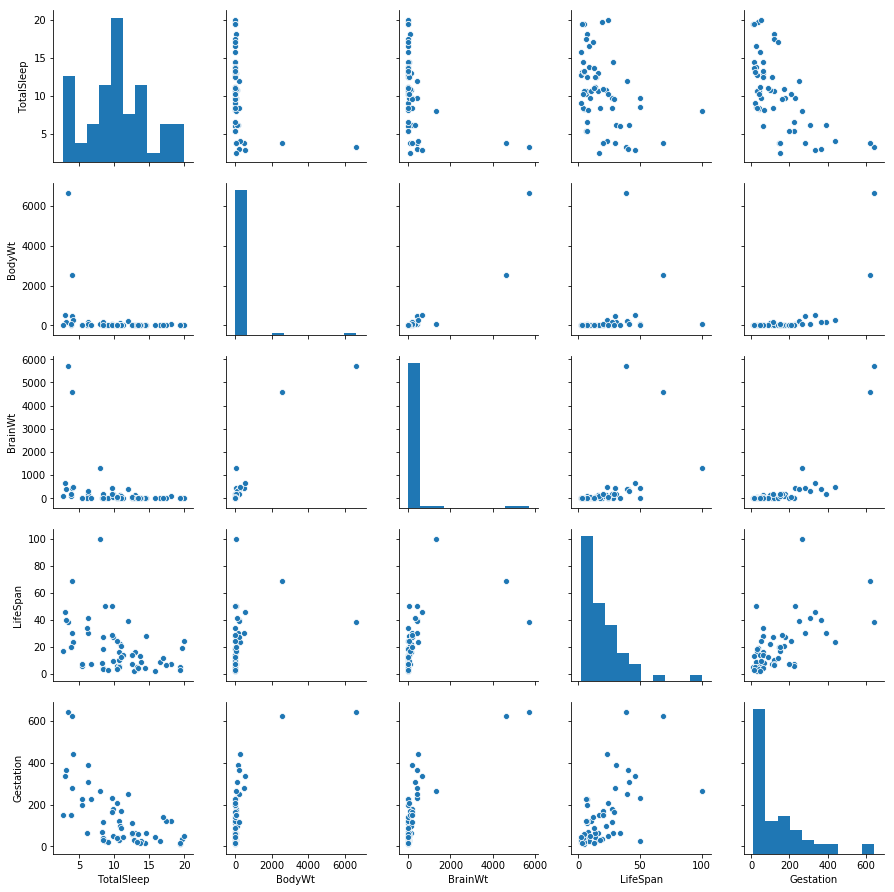

In [51]:
sleep_data1 = sleep_data[['TotalSleep', 'BodyWt','BrainWt','LifeSpan','Gestation']]
sns.pairplot(sleep_data1)

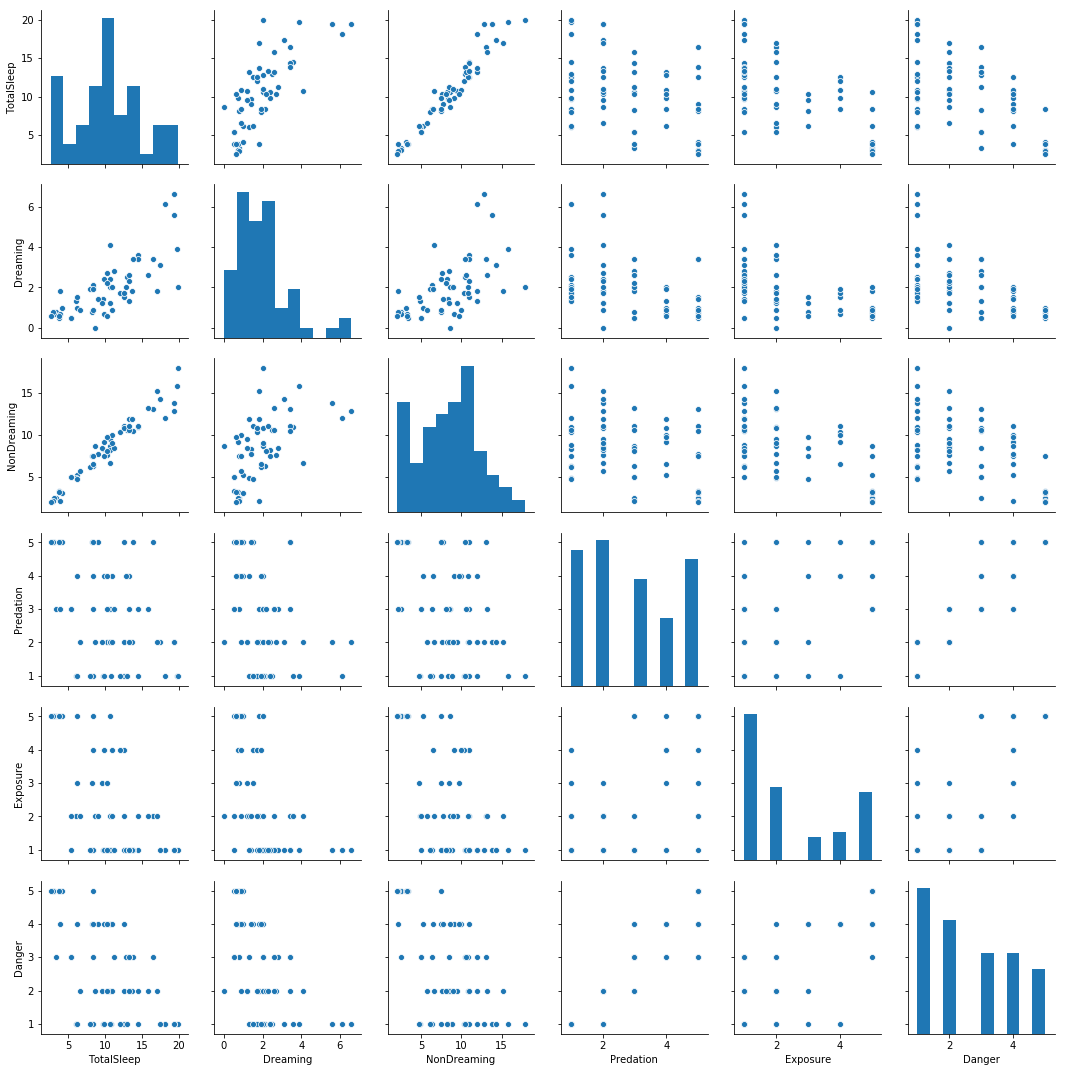

In [52]:
sleep_data2 = sleep_data[['TotalSleep', 'Dreaming','NonDreaming', 'Predation','Exposure', 'Danger']]
sns.pairplot(sleep_data2)

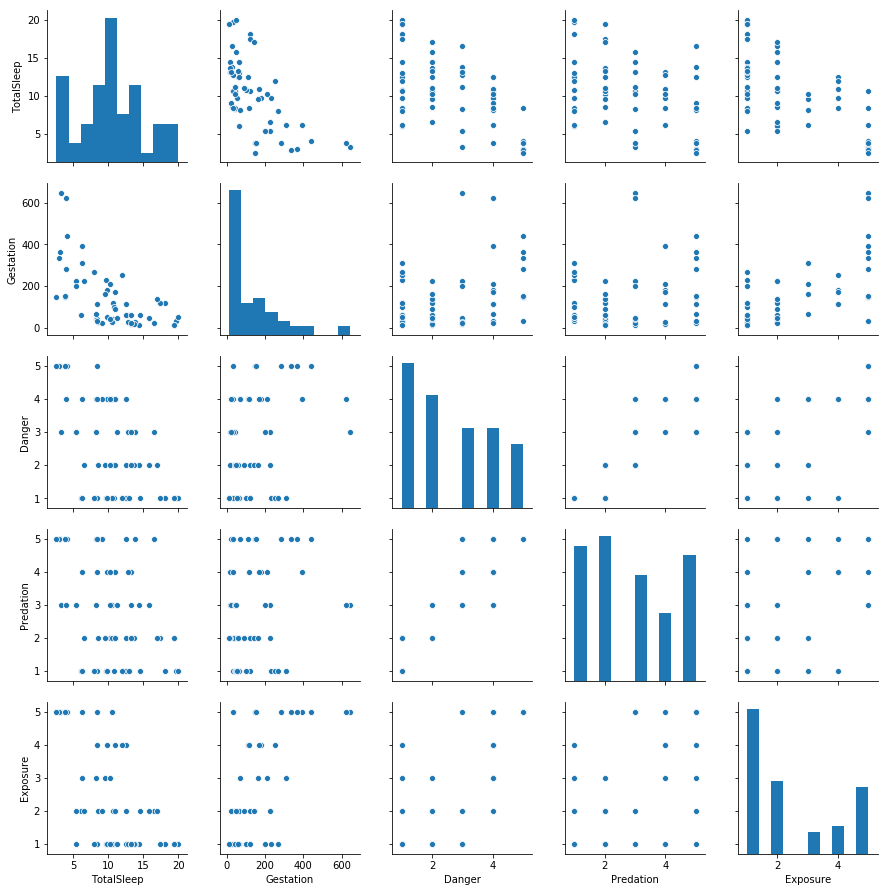

In [87]:
sleep_data3 = sleep_data[['TotalSleep', 'Gestation', 'Danger', 'Predation', 'Exposure']]
sns.pairplot(sleep_data3)

## Part B: Heart Disease

### Step A: Read in Dataset and Display Descriptive Statistics

In [53]:
columns = ['Age', 'Sex', 'Pain', 'BP', 'Chol', 'BS', 'Cardio', 'HR', 'Angina', 'STPeak', 'STSlope', 'NumVess', 'Thal', 'HDis']
heart_data = pd.read_csv('heart.csv', names = columns)

In [54]:
heart_data.shape

(270, 14)

In [55]:
heart_data.dtypes

Age          int64
Sex          int64
Pain         int64
BP           int64
Chol         int64
BS           int64
Cardio       int64
HR           int64
Angina       int64
STPeak     float64
STSlope      int64
NumVess      int64
Thal         int64
HDis         int64
dtype: object

In [56]:
heart_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Age,70.0,67.0,57.0,64.0,74.0,65.0,56.0,59.0,60.0,63.0
Sex,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
Pain,4.0,3.0,2.0,4.0,2.0,4.0,3.0,4.0,4.0,4.0
BP,130.0,115.0,124.0,128.0,120.0,120.0,130.0,110.0,140.0,150.0
Chol,322.0,564.0,261.0,263.0,269.0,177.0,256.0,239.0,293.0,407.0
BS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Cardio,2.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0
HR,109.0,160.0,141.0,105.0,121.0,140.0,142.0,142.0,170.0,154.0
Angina,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
STPeak,2.4,1.6,0.3,0.2,0.2,0.4,0.6,1.2,1.2,4.0


In [57]:
heart_data.tail(10).T

,260,261,262,263,264,265,266,267,268,269
Age,58.0,60.0,58.0,49.0,48.0,52.0,44.0,56.0,57.0,67.0
Sex,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Pain,3.0,4.0,2.0,2.0,2.0,3.0,2.0,2.0,4.0,4.0
BP,120.0,130.0,120.0,130.0,110.0,172.0,120.0,140.0,140.0,160.0
Chol,340.0,206.0,284.0,266.0,229.0,199.0,263.0,294.0,192.0,286.0
BS,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Cardio,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
HR,172.0,132.0,160.0,171.0,168.0,162.0,173.0,153.0,148.0,108.0
Angina,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
STPeak,0.0,2.4,1.8,0.6,1.0,0.5,0.0,1.3,0.4,1.5


In [58]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Pain,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Chol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
BS,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
Cardio,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
STPeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [59]:
heart_data.isnull().sum()

Age        0
Sex        0
Pain       0
BP         0
Chol       0
BS         0
Cardio     0
HR         0
Angina     0
STPeak     0
STSlope    0
NumVess    0
Thal       0
HDis       0
dtype: int64

### Step B: Show the Distribution of Variables

In [60]:
heart_data['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [61]:
heart_data['Pain'].value_counts()

4    129
3     79
2     42
1     20
Name: Pain, dtype: int64

In [62]:
heart_data['BS'].value_counts()

0    230
1     40
Name: BS, dtype: int64

In [63]:
heart_data['Cardio'].value_counts()

2    137
0    131
1      2
Name: Cardio, dtype: int64

In [64]:
heart_data['Angina'].value_counts()

0    181
1     89
Name: Angina, dtype: int64

In [65]:
heart_data['HDis'].value_counts()

1    150
2    120
Name: HDis, dtype: int64

(array([ 1.,  0.,  5.,  3.,  6., 24., 17., 18., 12., 23., 29., 21., 39.,
        18., 16., 22.,  6.,  7.,  1.,  2.]),
 array([29. , 31.4, 33.8, 36.2, 38.6, 41. , 43.4, 45.8, 48.2, 50.6, 53. ,
        55.4, 57.8, 60.2, 62.6, 65. , 67.4, 69.8, 72.2, 74.6, 77. ]),
 <a list of 20 Patch objects>)

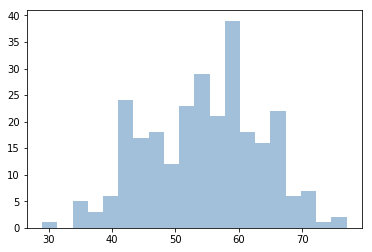

In [66]:
plt.hist(heart_data['Age'], bins=20, alpha=0.5, color='steelblue')

(array([ 20.,   0.,   0.,   0.,   0.,   0.,  42.,   0.,   0.,   0.,   0.,
          0.,   0.,  79.,   0.,   0.,   0.,   0.,   0., 129.]),
 array([1.  , 1.15, 1.3 , 1.45, 1.6 , 1.75, 1.9 , 2.05, 2.2 , 2.35, 2.5 ,
        2.65, 2.8 , 2.95, 3.1 , 3.25, 3.4 , 3.55, 3.7 , 3.85, 4.  ]),
 <a list of 20 Patch objects>)

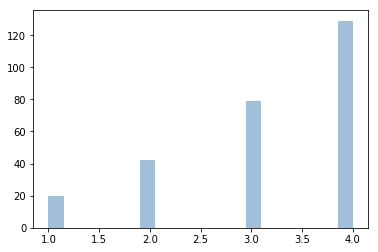

In [67]:
plt.hist(heart_data['Pain'], bins=20, alpha=0.5, color='steelblue')

(array([ 2.,  7., 16., 44., 47., 46., 40., 27., 24.,  9.,  3.,  0.,  3.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([126. , 147.9, 169.8, 191.7, 213.6, 235.5, 257.4, 279.3, 301.2,
        323.1, 345. , 366.9, 388.8, 410.7, 432.6, 454.5, 476.4, 498.3,
        520.2, 542.1, 564. ]),
 <a list of 20 Patch objects>)

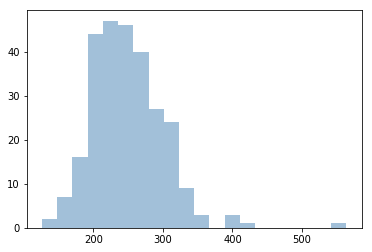

In [68]:
plt.hist(heart_data['Chol'], bins=20, alpha=0.5, color='steelblue')

(array([ 1.,  0.,  1.,  4.,  3.,  8., 12., 11., 15., 16., 24., 21., 32.,
        39., 26., 28., 18.,  6.,  4.,  1.]),
 array([ 71.  ,  77.55,  84.1 ,  90.65,  97.2 , 103.75, 110.3 , 116.85,
        123.4 , 129.95, 136.5 , 143.05, 149.6 , 156.15, 162.7 , 169.25,
        175.8 , 182.35, 188.9 , 195.45, 202.  ]),
 <a list of 20 Patch objects>)

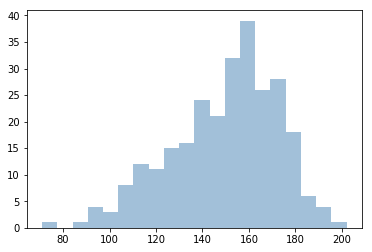

In [69]:
plt.hist(heart_data['HR'], bins=20, alpha=0.5, color='steelblue')

(array([150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 120.]),
 array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
        1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ]),
 <a list of 20 Patch objects>)

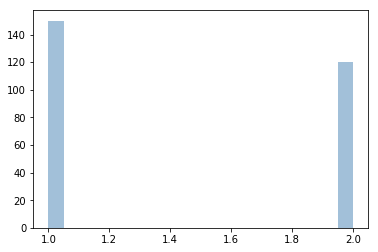

In [70]:
plt.hist(heart_data['HDis'], bins=20, alpha=0.5, color='steelblue')

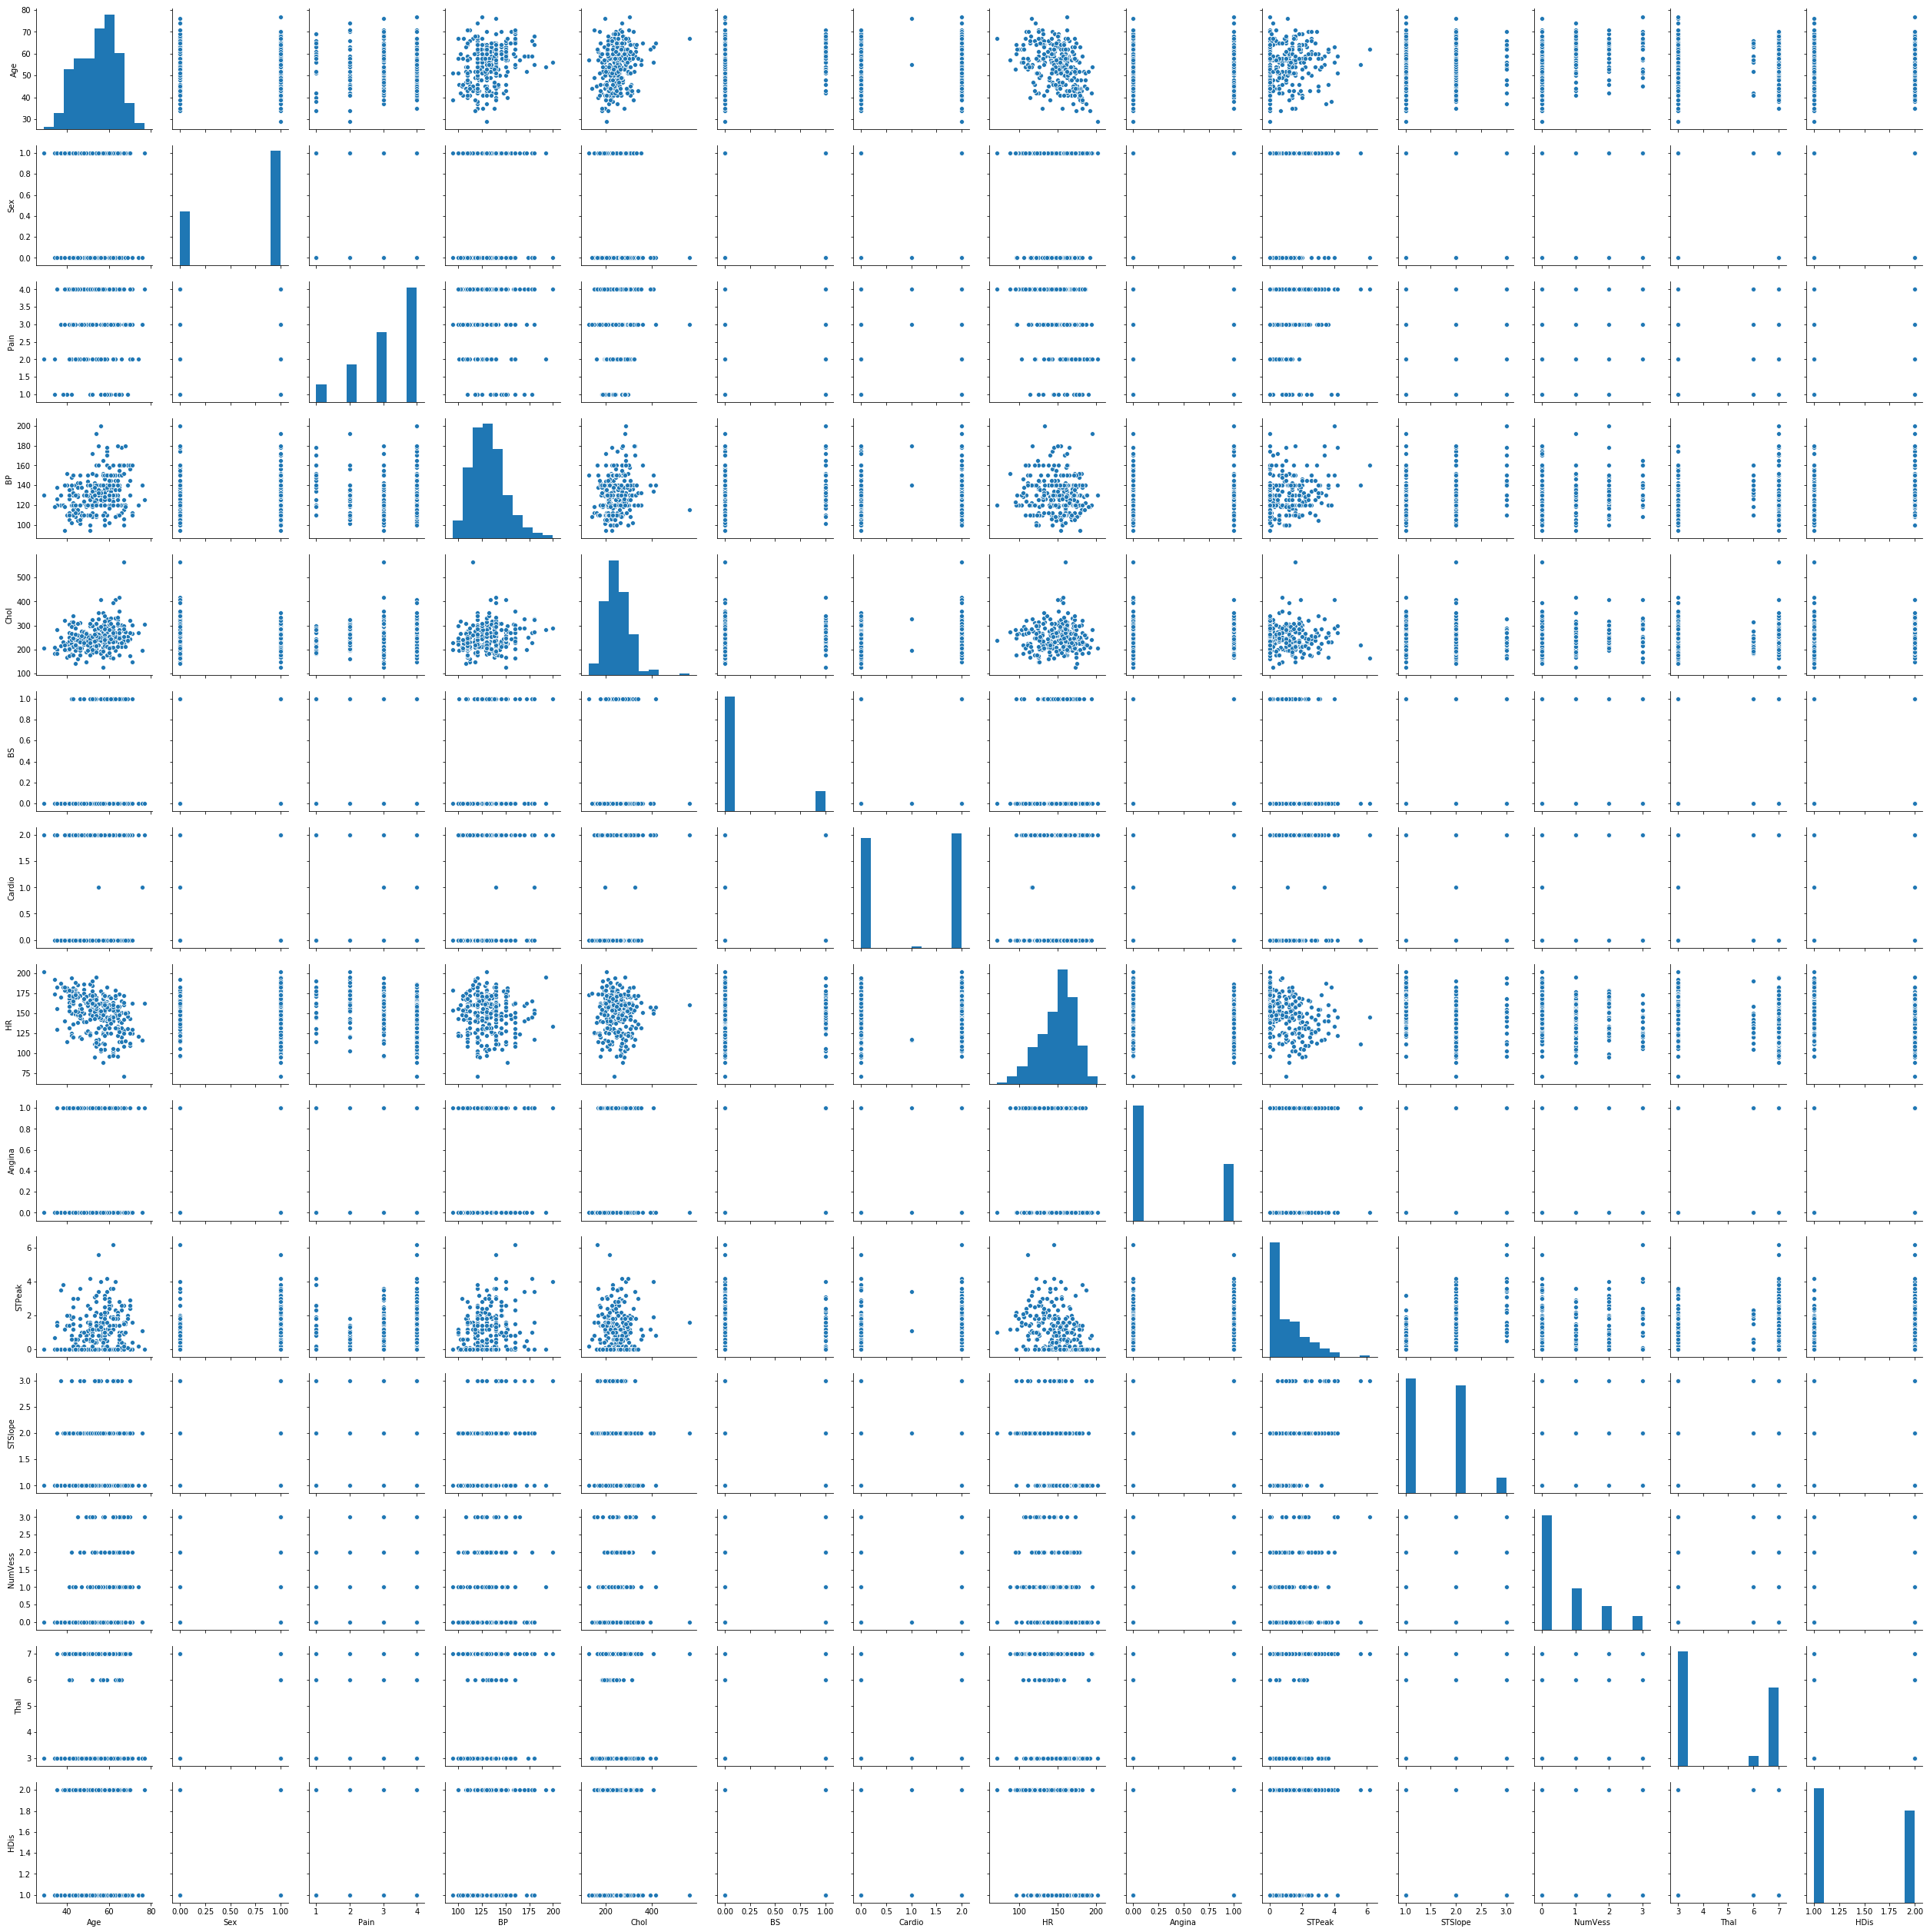

In [71]:
%matplotlib inline
sns.pairplot(heart_data)

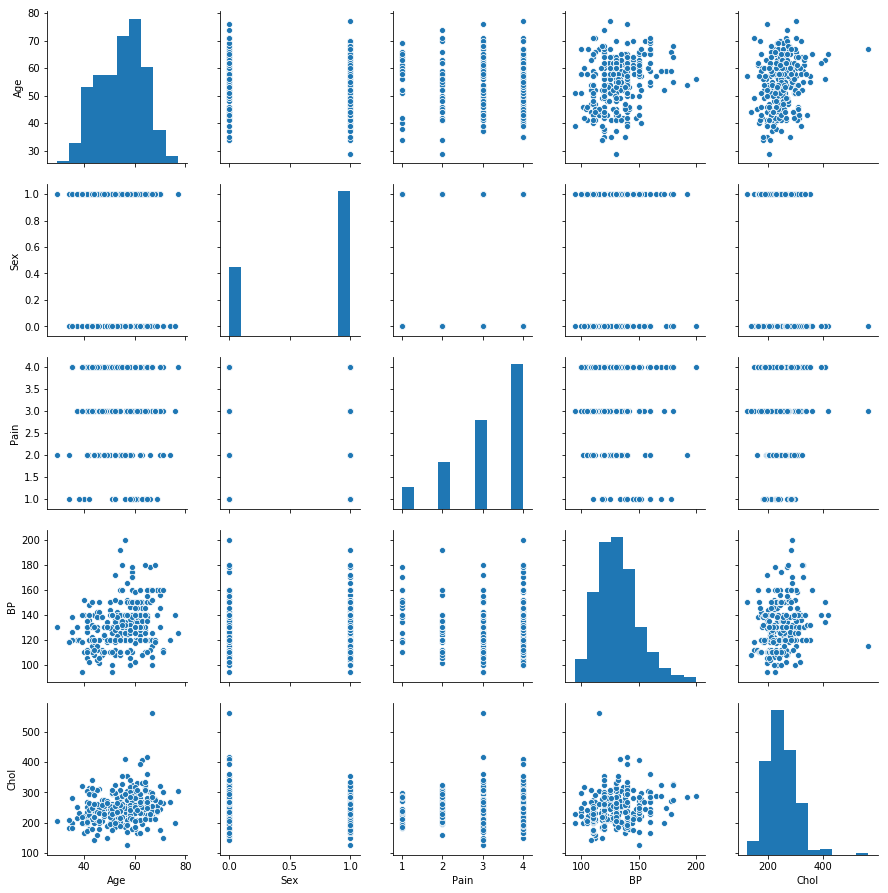

In [72]:
heart_data1 = heart_data[['Age','Sex','Pain','BP','Chol']]
sns.pairplot(heart_data1)

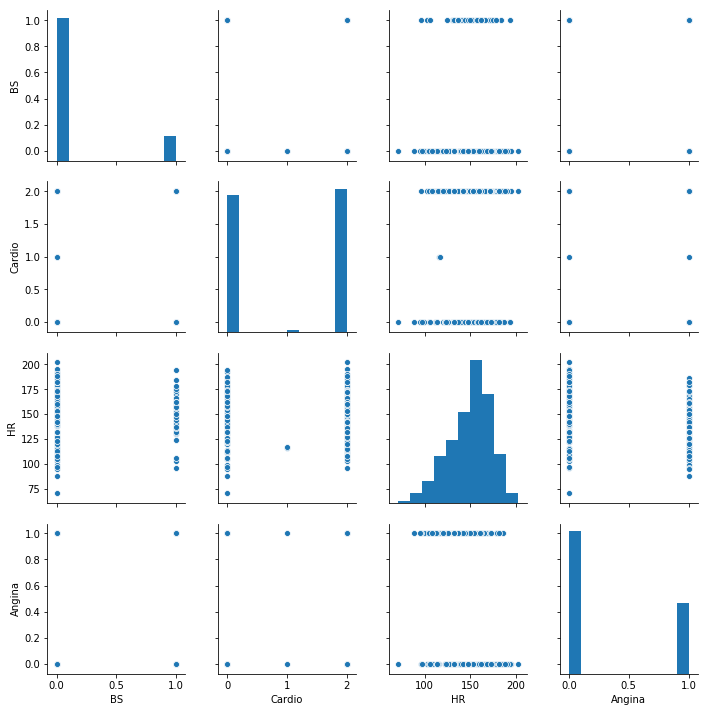

In [73]:
heart_data2 = heart_data[['BS','Cardio','HR','Angina']]
sns.pairplot(heart_data2)

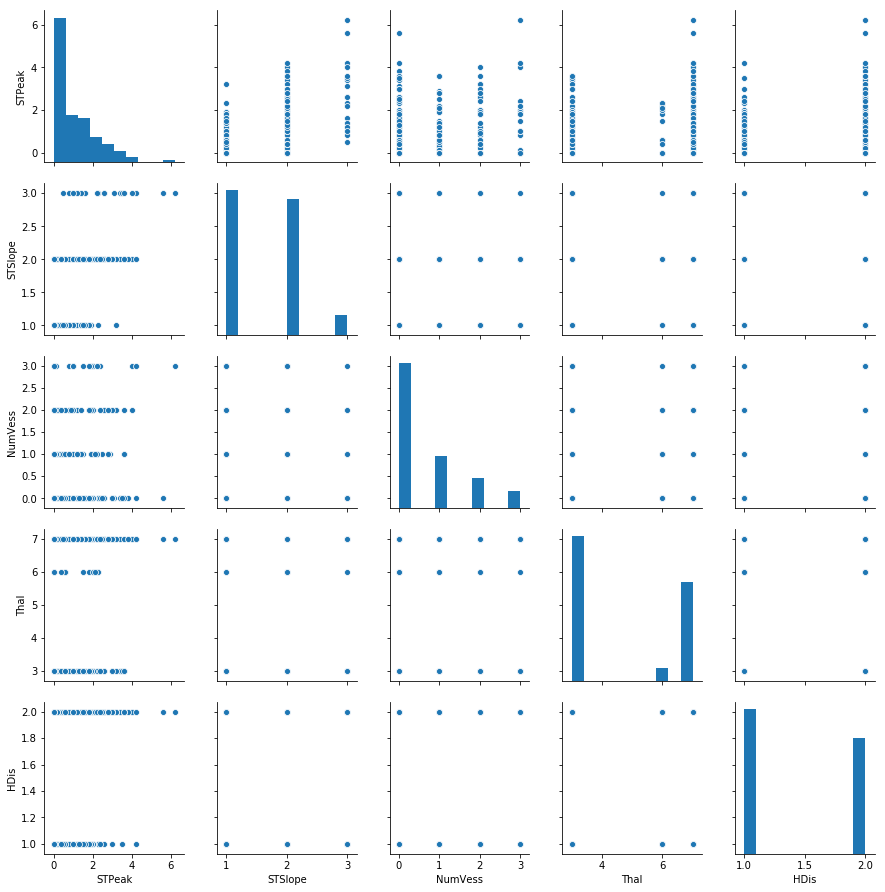

In [74]:
heart_data3 = heart_data[['STPeak','STSlope','NumVess','Thal','HDis']]
sns.pairplot(heart_data3)

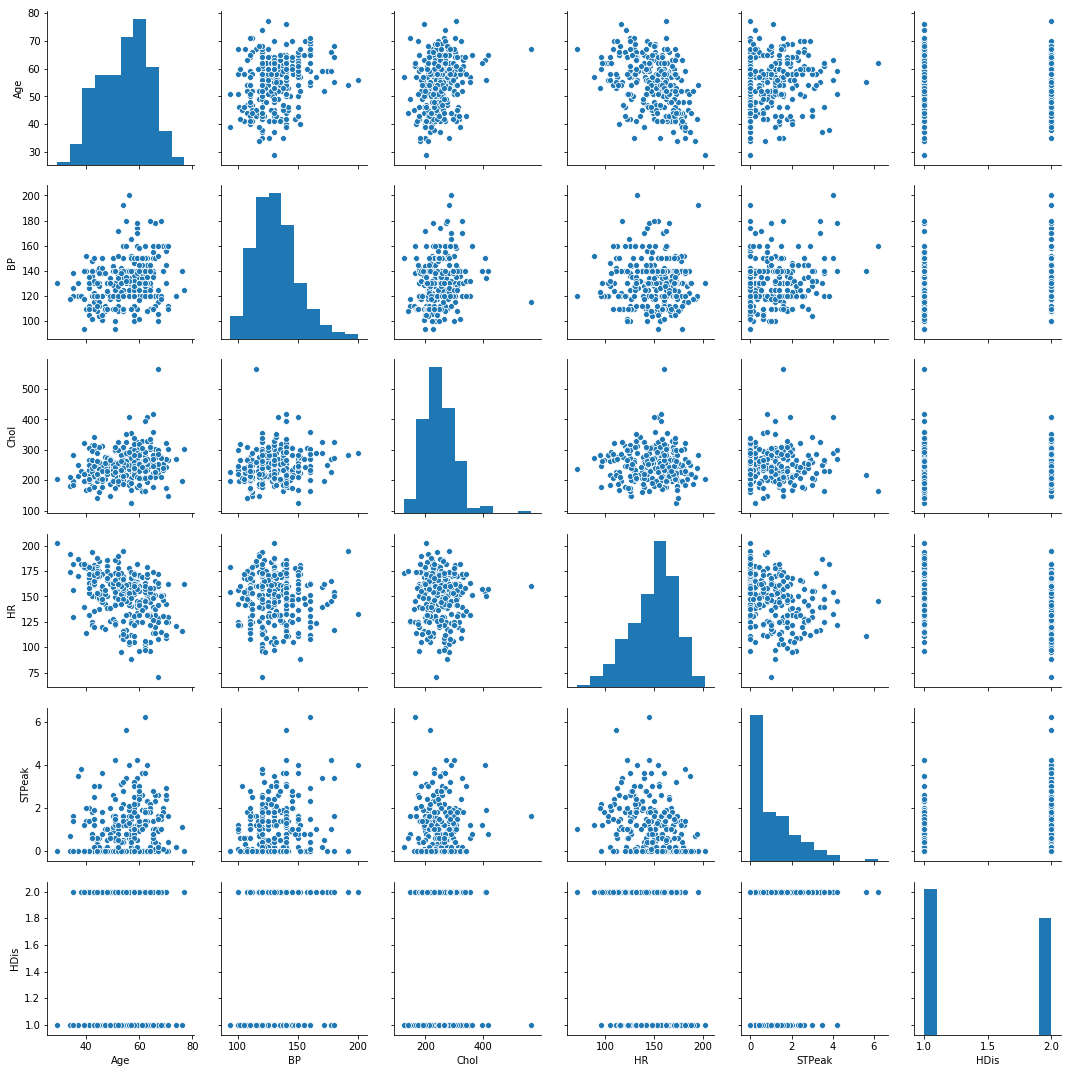

In [75]:
heart_data4 = heart_data[['Age','BP','Chol','HR','STPeak', 'HDis']]
sns.pairplot(heart_data4)

### Step C: Examine the Relationship Between the Variables

In [76]:
heart_data.corr()

,Age,Sex,Pain,BP,Chol,BS,Cardio,HR,Angina,STPeak,STSlope,NumVess,Thal,HDis
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Pain,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Chol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
BS,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
Cardio,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
STPeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


In [77]:
heart_corr = heart_data.corr()
grps = ['NegStrong','NegMedium','Weak','PosMedium', 'PosStrong']
for col in columns:
    heart_corr[col] = pd.cut(heart_corr[col],(-1,-0.7,-0.5,0.5,0.7,1), labels=grps)
heart_corr

,Age,Sex,Pain,BP,Chol,BS,Cardio,HR,Angina,STPeak,STSlope,NumVess,Thal,HDis
Age,PosStrong,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak
Sex,Weak,PosStrong,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak
Pain,Weak,Weak,PosStrong,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak
BP,Weak,Weak,Weak,PosStrong,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak
Chol,Weak,Weak,Weak,Weak,PosStrong,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak
BS,Weak,Weak,Weak,Weak,Weak,PosStrong,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak
Cardio,Weak,Weak,Weak,Weak,Weak,Weak,PosStrong,Weak,Weak,Weak,Weak,Weak,Weak,Weak
HR,Weak,Weak,Weak,Weak,Weak,Weak,Weak,PosStrong,Weak,Weak,Weak,Weak,Weak,Weak
Angina,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,PosStrong,Weak,Weak,Weak,Weak,Weak
STPeak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,PosStrong,PosMedium,Weak,Weak,Weak


In [78]:
# For each of the values of HDis and Sex, display  
# the mean values of the variables: Age, BP, Chol,
# HR and Pain
heart_data.pivot_table(index = ['HDis'], columns = ['Sex'], aggfunc = {'Age': 'mean', 'BP': 'mean', 'Chol': 'mean', 'HR': 'mean', 'Pain': 'mean'})

Age                     BP                    Chol              \
Sex          0          1           0           1           0           1   
HDis                                                                        
1     54.58209  51.192771  128.283582  129.337349  257.208955  233.722892   
2     59.35000  56.040000  148.650000  131.600000  290.000000  249.760000   

              HR                  Pain            
Sex            0           1         0         1  
HDis                                              
1     154.835821  161.156627  2.910448  2.746988  
2     143.500000  137.930000  3.850000  3.570000

### Step D: Transform the Categorical Variables to Dummies

In [79]:
pain_dum = pd.get_dummies(heart_data['Pain'], prefix = 'Pain')
card_dum = pd.get_dummies(heart_data['Cardio'], prefix = 'Card')
thal_dum = pd.get_dummies(heart_data['Thal'], prefix = 'Thal')

In [80]:
heart_X1 = heart_data[['Age','Sex']].join(pain_dum)
heart_X2 = heart_data[['BP','Chol','BS']].join(card_dum)
heart_X3 = heart_data[['HR','Angina','STPeak', 'STSlope','NumVess']].join (thal_dum)
heart_Y = heart_data[['HDis']]

In [81]:
heart_data = pd.concat([heart_Y, heart_X1, heart_X2, heart_X3], axis=1)

In [82]:
heart_data.T

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
HDis,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
Age,70.0,67.0,57.0,64.0,74.0,65.0,56.0,59.0,60.0,63.0,...,58.0,60.0,58.0,49.0,48.0,52.0,44.0,56.0,57.0,67.0
Sex,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Pain_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pain_2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
Pain_3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Pain_4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
BP,130.0,115.0,124.0,128.0,120.0,120.0,130.0,110.0,140.0,150.0,...,120.0,130.0,120.0,130.0,110.0,172.0,120.0,140.0,140.0,160.0
Chol,322.0,564.0,261.0,263.0,269.0,177.0,256.0,239.0,293.0,407.0,...,340.0,206.0,284.0,266.0,229.0,199.0,263.0,294.0,192.0,286.0
BS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Step E: Display Interesting Facts

In [83]:
# Lowest one percent of subjects in this study 
# for blood pressure (1th percentile)
low_BP = heart_data[heart_data['BP'].quantile(0.01) >= heart_data['BP']]
low_BP.T 

,77,97,106,172,196,217
HDis,1.0,2.0,1.0,2.0,1.0,1.0
Age,39.0,58.0,51.0,67.0,58.0,51.0
Sex,0.0,1.0,1.0,1.0,0.0,1.0
Pain_1,0.0,0.0,0.0,0.0,0.0,0.0
Pain_2,0.0,0.0,0.0,0.0,0.0,0.0
Pain_3,1.0,0.0,1.0,0.0,0.0,1.0
Pain_4,0.0,1.0,0.0,1.0,1.0,0.0
BP,94.0,100.0,100.0,100.0,100.0,94.0
Chol,199.0,234.0,222.0,299.0,248.0,227.0
BS,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
low_BP['HDis'] >= 2

77     False
97      True
106    False
172     True
196    False
217    False
Name: HDis, dtype: bool